# **Importing Necessary Libraries**

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading the dataset
movie_interest = pd.read_csv('Movie Interests.csv')

In [3]:
# Display the few rows
movie_interest.head()

,Age,Gender,Interest
0,8,Male,Animation
1,11,Male,Animation
2,12,Male,Animation
3,16,Male,Action
4,18,Male,Action


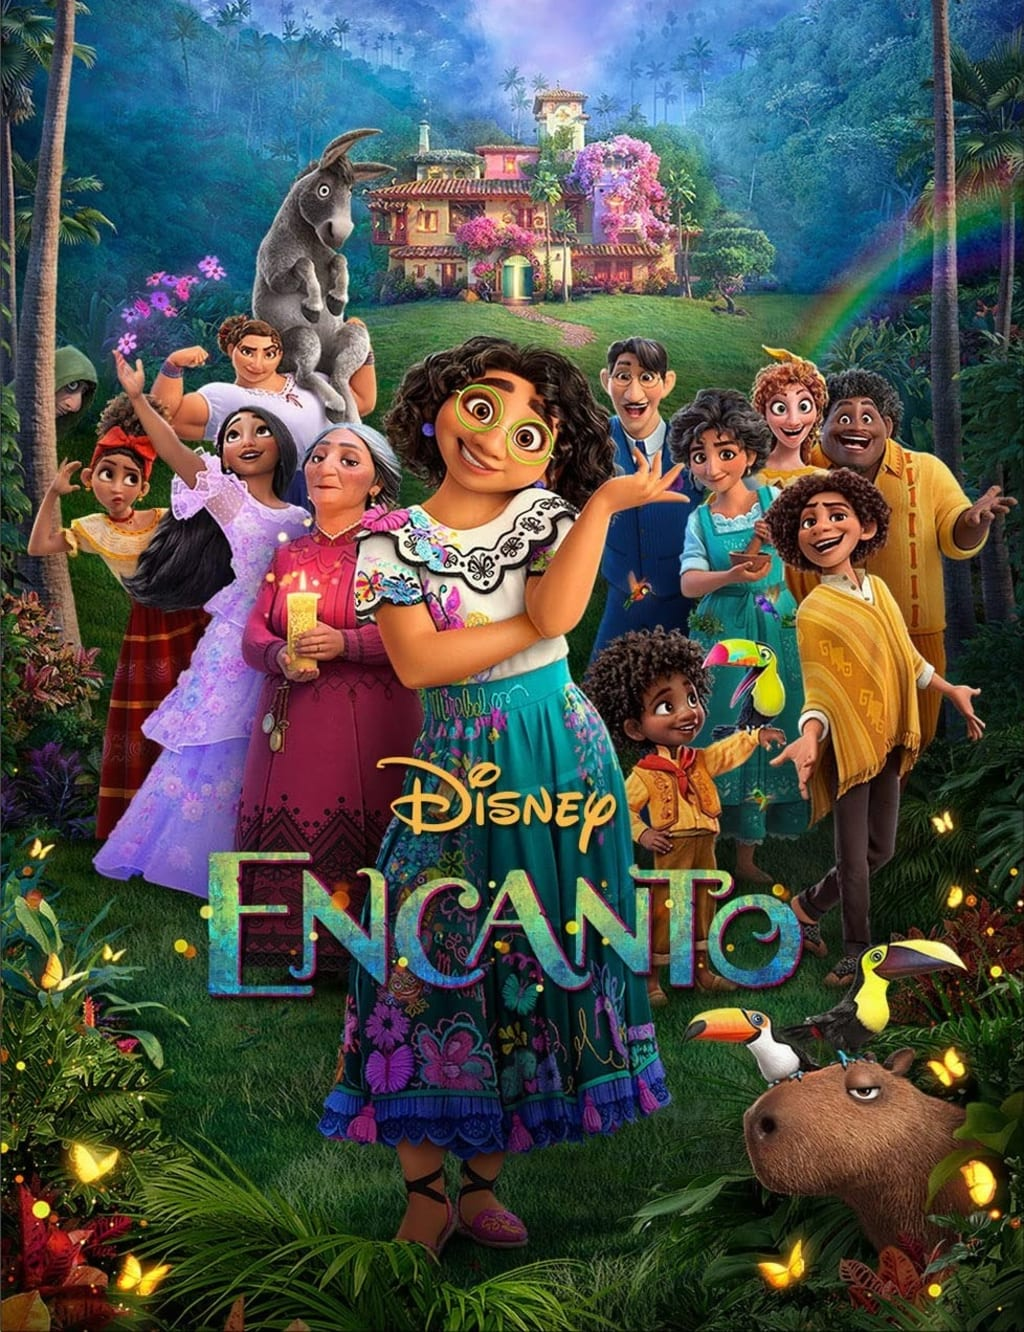

In [4]:
from IPython.display import Image

# Display the Image
Image(filename = r"C:\Users\valmi\Downloads\64369aacaf1a24001db53dbf.jpg")

# **About Dataset**

This dataset contains information about movie interests based on age and gender. It can be used for analyzing movie preferences among different demographics. The columns in the dataset are as follows:
- Age - Age of the individual.
- Gender - Gender of the individual (Male/Female).
- Interest - Movie genre preference (e.g., Animation, Action).

# **Exploratory Data Analysis (EDA)**

## **1️⃣ Changing the Columns name to lower case**

In [5]:
# In Python, lower() is a built-in string methond used to convert all the upper case characters in a string to lowercase.
movie_interest.columns = [cols.lower() for cols in movie_interest.columns]

In [6]:
movie_interest.head()

,age,gender,interest
0,8,Male,Animation
1,11,Male,Animation
2,12,Male,Animation
3,16,Male,Action
4,18,Male,Action


## **2️⃣ Checking the shape of the dataset**

In [8]:
# In Pandas, df.shape method provides information about the no.of rows and columns in a DataFrame quickly and easily
movie_interest.shape

(18, 3)

## **3️⃣ Checking the data types in the dataset**

In [9]:
# df.dtypes, is an attribute in Pandas DataFrames that returns a Series containing the data type of each column.
movie_interest.dtypes

age          int64
gender      object
interest    object
dtype: object

## **4️⃣ Checking the unique values in the dataset**

In [53]:
# df.nunique() is a Pandas function that counts the number of distinct, non-null values in each column or row of a DataFrame.
movie_interest.nunique()

age         16
gender       2
interest     3
dtype: int64

## **5️⃣ Checking any null values in the dataset**

In [47]:
# In Pandas, df.isnull().sum() is used to count the number of missing values (Nan or Null) in each column of a DataFrame.
movie_interest.isnull().sum()

age         0
gender      0
interest    0
dtype: int64

## **6️⃣ Checking the statistical information of the datset**

In [49]:
# In pandas, df.describe() ia a method that provides descriptive statistics about the numerical columns in a DataFrame.
movie_interest.describe()

,age
count,18.000000
mean,20.500000
std,9.444887
min,7.000000
25%,11.250000
50%,21.000000
75%,27.000000
max,35.000000


# **7️⃣ Checking the summary information of the dataset**

In [54]:
# In Python's Pandas library, the info() method is used to get a summary of a dataset in the pandas library, number of columns, column data types, memory usage.
movie_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       18 non-null     int64 
 1   gender    18 non-null     object
 2   interest  18 non-null     object
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


## **The output of df.info() typically includes the following information:**
- **Number of rows (entries)**: The total number of rows in the DataFrame.
- **Number of columns**: The total number of columns in the DataFrame.
- **Column names**: A list of all column names in the DataFrame.
- **Data types of each column**: The data type of each column, such as integer (int), float, string (object), or datetime.
- **Number of non-null values per column**: The count of non-missing values in each column. This helps identify columns with missing data.
- **Memory usage**: The total memory usage of the DataFrame, which can be helpful for performance optimization.

## **Column-Wise Analysis**
#### **Iterate through each column**

In [71]:
for column in movie_interest.columns:
    print(f"\nAnalysis for '{column}':")
    print(f"Data Type       : {movie_interest[column].dtype}")
    print(f"Unique Values   : {movie_interest[column].nunique()}")
    print(f"Missing Values  : {movie_interest[column].isnull().sum()}")
    
    if movie_interest[column].dtype in ['int64', 'float64']:
        print(f"Mean            : {movie_interest[column].mean()}")
        print(f"Median          : {movie_interest[column].median()}")


Analysis for 'age':
Data Type       : int64
Unique Values   : 16
Missing Values  : 0
Mean            : 20.5
Median          : 21.0

Analysis for 'gender':
Data Type       : int64
Unique Values   : 2
Missing Values  : 0
Mean            : 1.5
Median          : 1.5

Analysis for 'interest':
Data Type       : object
Unique Values   : 3
Missing Values  : 0


## **8️⃣ Converting the Categorical column into numerical column**

In [64]:
movie_interest.replace({'gender': {'Male' : 1, 'Female' : 2}}, inplace = True)

In [65]:
movie_interest.head()

,age,gender,interest
0,8,1,Animation
1,11,1,Animation
2,12,1,Animation
3,16,1,Action
4,18,1,Action


# **Dividing Input and Output Dataset**

In [72]:
input_dataset = movie_interest.drop(columns = ['interest'])

In [74]:
input_dataset.head()

,age,gender
0,8,1
1,11,1
2,12,1
3,16,1
4,18,1


In [75]:
output_dataset = movie_interest['interest']

In [76]:
output_dataset.head()

0    Animation
1    Animation
2    Animation
3       Action
4       Action
Name: interest, dtype: object

# **train_test_split**

In [86]:
from sklearn.model_selection import train_test_split

# Splitting the data into input and output for training dataset
input_dataset_train, input_dataset_test, output_dataset_train, output_dataset_test = train_test_split (
    input_dataset, output_dataset, test_size = 0.2, random_state = 42
)

# **Model Building**

In [87]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
model = DecisionTreeClassifier()

# Training the model with input and output dataset
model.fit(input_dataset_train, output_dataset_train)

DecisionTreeClassifier()

# **Prediction**

In [91]:
movie_interest = model.predict(input_dataset_test)
movie_interest

array(['Animation', 'Animation', 'Drama', 'Action'], dtype=object)

# **Accuracy**

In [89]:
from sklearn.metrics import accuracy_score

# Checking the accuracy score
accuracy = accuracy_score(output_dataset_test, movie_interest)

#Print the result
print("Accuaracy", accuracy)

Accuaracy 1.0


# **Machine Learning Persistence**
- In machine learning, persistence refers to **the ability of a model to save its trained state and be reloaded later for furhter use, essentially "remembering" what it has learned**.
- This is often referred to as model serialization or model checkpointing. It allows for efficient deployment and reuse of models in various contexts, such as real-time inference or offiline predicrtion.

# **Joblib library in Machine Learning Persistence**
- In the context of machine learning persistence, a "joblib" library is **a Python library used for saving and loading machine learning models, particularly those containing large NumPy arrays**.
- It's essentially an alternative to the pickle module, but designed to be more efficient and robust when dealing with data-heavy objects. Joblib also offers features like transparent disk caching and parallel computing, making it suitable for vasrious machine learning tasks.

# **Saving the trained model**

In [92]:
# Importing the joblib library to save the trained model
import joblib

# Saving the trained model
joblib.dump(model, 'Movie-Interest-Identifier.pkl')

['Movie-Interest-Identifier.pkl']

# **Checking how the trained model is predicting**

In [93]:
# Load the savel model
trained_movie_interest_model = joblib.load('Movie-Interest-Identifier.pkl')

# Checking how the trained model is predicting
predictions = trained_movie_interest_model.predict([[9,1], [33,2]])

# Print the predictions
print('Predictions:', predictions)

Predictions: ['Animation' 'Drama']
